In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [3]:
telcom = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('Shape of train: ', telcom.shape)
print('Features with missing values', telcom.isnull().sum().values.sum())
print('\nFeatures:\n', telcom.columns.tolist())
print('\nUnique features in the dataset\n', telcom.nunique())

Shape of train:  (7043, 21)
Features with missing values 0

Features:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique features in the dataset
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### *Data Manipulation*

In [6]:
# Since there are empty spaces in 'TotalCharges', replace them with NaN
telcom['TotalCharges'] = telcom['TotalCharges'].replace(' ', np.nan)
print('Number of null values in the TotalCharges columns: ', telcom['TotalCharges'].isnull().sum())

Number of null values in the TotalCharges columns:  11


In [7]:
# select only those with non-null
telcom = telcom[telcom['TotalCharges'].notnull()]
#convert to float type
telcom['TotalCharges'] = telcom['TotalCharges'].astype('float')
telcom = telcom.reset_index(drop=True)

# convert 'SeniorCitizen' to categorical
telcom['SeniorCitizen'] = telcom['SeniorCitizen'].astype('object')
telcom.head()


# Store the ID column and target column
Id = telcom['customerID']
target = telcom['Churn']
#telcom.drop('customerID', axis=1, inplace=True)

In [8]:
telcom.columns
# replace columns with 'No internet service' with No
cols_replace= ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for col in cols_replace:
    telcom[col].replace({'No internet service': 'No'}, inplace=True)
telcom['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

In [9]:
telcom['tenure_group'] = pd.cut(telcom['tenure'], range(0, 120, 12), labels= ['upto 1Y', 'upto 2Y', 'upto 3Y', 'upto 4Y', 'upto 5Y', 'upto 6Y', 'upto 7Y', 'upto 8Y', 'upto 9Y'])
telcom['tenure_group'] = telcom['tenure_group'].astype('object')
telcom.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,upto 2Y
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,upto 6Y
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,upto 1Y
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,upto 1Y
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,upto 6Y


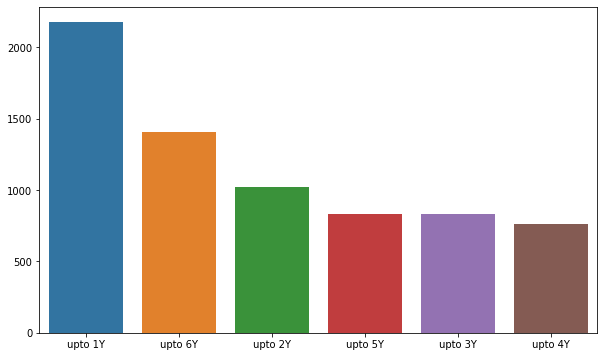

In [10]:
# Converting the 'tenure' into a categorical group
#telcom['tenure_group'] = pd.cut(telcom['tenure'], range(0, 120, 12)).astype('object')
group = telcom['tenure_group'].value_counts()
plt.rcParams['figure.figsize']=[10,6]
sns.barplot(x=group.index, y=group.values)

In [11]:
telcom['tenure_group'].value_counts()

upto 1Y    2175
upto 6Y    1407
upto 2Y    1024
upto 5Y     832
upto 3Y     832
upto 4Y     762
Name: tenure_group, dtype: int64

In [12]:
# split into two groups
churn = telcom[telcom['Churn']== 'Yes']
no_churn = telcom[telcom['Churn']== 'No']


# Categorical features
features_cat = telcom.select_dtypes(include=['object']).columns.tolist()
# removing the target column for the categorical list
features_cat = [col for col in features_cat if col not in ['Churn', 'customerID']]
features_numeric = telcom.select_dtypes(exclude=['object']).columns.tolist()
display(features_cat)
display(features_numeric)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

['tenure', 'MonthlyCharges', 'TotalCharges']

### * Exploratory Data Analysis*

In [13]:
labels = telcom['Churn'].value_counts().keys().tolist()
values = telcom['Churn'].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, title='Customer attrition')])
fig.show()


### *Variable distribution in Customer churn*

In [14]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,upto 1Y
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,upto 3Y
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,upto 1Y
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,upto 4Y
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,upto 1Y


In [15]:
#for churn
#col='gender'

def plot_pie(col):
    
    #fig = make_subplots(1,2, subplot_titles=['Churn', 'No Churn'])
    # subplots do not work for 'Piechart' as there is no (x,y) location
    # need to use 'domain' to specify location

    #for churn
    trace1 = go.Pie(labels = churn[col].value_counts().keys().tolist(),
                values = churn[col].value_counts().values.tolist(),
                hoverinfo = 'label+name',
                name= 'Churn Customers',
                domain = dict(x=[0, .48]),
                title='Churn customers',
                marker  = dict(line = dict(width = 2)),
                hole=0.6)

    #for non churn
    trace2 = go.Pie(labels = no_churn[col].value_counts().keys().tolist(),
                    values = no_churn[col].value_counts().values.tolist(),
                    hoverinfo = 'label+name',
                    name= 'Non Churn Customers',
                    domain = dict(x=[0.52, 1]),
                    title='Non Churn customers',
                    marker  = dict(line = dict(width = 5)),
                    hole=0.6)

    fig= go.Figure(data=[trace1, trace2])
    fig.update_layout(title_text='Attriton across '+ str(col))
    fig.show()

# histogram

def plot_hist(col):

    trace1 = go.Histogram(x= churn[col],
                         histnorm='percent',
                         name='Churn',
                         marker = dict(line=dict(width=2)),
                         marker_color='#EB89B5')

    trace2 = go.Histogram(x = no_churn[col],
                         histnorm='percent',
                         name='non-Churn',
                         marker= dict(line=dict(width=2)),
                         marker_color='#330C73')

    layout = go.Layout(dict(title=col + ' distribution in customer churn'),
                       bargap=0.2, 
                       bargroupgap=0.1,
                       xaxis = dict(title=col),
                       yaxis = dict(title='percent'))
    
    fig= go.Figure(data=[trace1, trace2], layout=layout)
    #fig.update_layout(bargap=0.2, bargroupgap=0.1)
    fig.show()

# scatterplot for numeric types

def plot_scatter(col):
    classes = telcom["Churn"].unique().tolist() # Yes/No
    class_code = {classes[k] : k for k in range(2)} # Yes: 1, No: 0
    color_vals = [class_code[cl] for cl in telcom["Churn"]] # list of 1s and 0s
    
    trace1 = go.Splom(dimensions=[dict(label='tenure',
                                      values = telcom['tenure']),
                                 dict(label ='MonthlyCharges',
                                      values= telcom['MonthlyCharges']),
                                 dict(label ='TotalCharges',
                                      values= telcom['TotalCharges'])],
                      text = telcom['Churn'],
                      marker = dict(color= color_vals,
                                   colorscale='Portland'),
                     )

    layout = go.Layout(dict(
                            title='Scatter plot matrix for numerical features',
                            height=800,
                            width= 800,
                            dragmode='select',
                            hovermode='closest'
                            )
                        )
    fig = go.Figure(data=[trace1], layout=layout)
    fig.show()                  

In [16]:
#plot pie for categorical features
for col in features_cat:
    plot_pie(col)

# plot histogram for numeric
for col in features_numeric:
    plot_hist(col)
    
# plot scatterplot for numeric
plot_scatter(col)

### Monthly and Total charges across churn groups and Tenure groups

Text(0.5, 1.0, 'Monthly and Total charges across tenure groups')

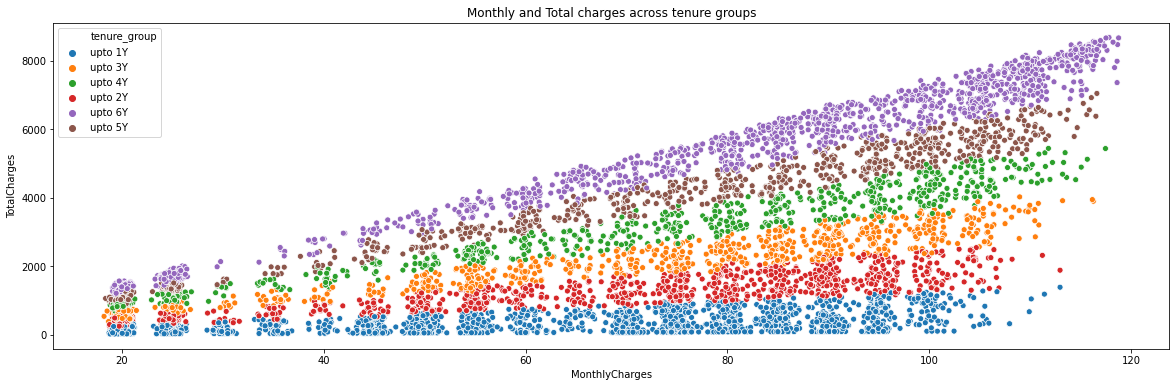

In [17]:
# trace = go.Scatter(x = telcom['MonthlyCharges'],
#            y = telcom['TotalCharges'],
#                  color=telcom['tenure_group'])
# fig = go.Figure(data=trace)
# fig.show()

# Using seaborn

fig = plt.figure(figsize=(20,6))
sns.scatterplot(x = telcom['MonthlyCharges'],
                y = telcom['TotalCharges'],
                hue =telcom['tenure_group'])
plt.title('Monthly and Total charges across tenure groups')

In [18]:
# using plotly express
px.scatter(telcom,
           x = 'MonthlyCharges',
           y = 'TotalCharges',
           color='tenure_group',
           #x_axis='Monthly charges',
           #y_axis='total charges',
           title = 'Monthly and Total charges across tenure groups')

In [19]:
# Monthyl and total charges across churn groups
px.scatter(telcom,
           x = 'MonthlyCharges',
           y = 'TotalCharges',
           color = 'Churn',
           title = 'Charges across Churn groups')

### *Average charges across Tenure groups*

In [20]:
# churn group
avg_charges = telcom.groupby(['tenure_group', 'Churn'])['MonthlyCharges', 'TotalCharges'].mean().reset_index()

# bar chart
# Monthly charges across churn groups
# Total charges across churn groups

def mean_charges(col, churn):
    trace = go.Bar(x = avg_charges[avg_charges['Churn'] == churn]['tenure_group'],
                   y = avg_charges[avg_charges['Churn'] == churn][col],
                   name=churn,
                   text = 'Churn')
    return trace
    
trace1 = mean_charges('MonthlyCharges', 'Yes')
trace2 = mean_charges('MonthlyCharges', 'No')
layout = go.Layout(dict(title='Average Monthly charges across tenure groups'),
                       xaxis= dict(title= 'tenure group'),
                       yaxis = dict(title= 'Average monthly charges')
                )

fig1 = go.Figure(data=[trace1, trace2], layout=layout)
fig1.show()


# total charges
trace3 = mean_charges('TotalCharges', 'Yes')
trace4 = mean_charges('TotalCharges', 'No')
layout = go.Layout(dict(title='Total Charges across tenure groups'),
                       xaxis= dict(title= 'tenure group'),
                       yaxis = dict(title= 'Average total charges')
                )

fig2 = go.Figure(data=[trace3, trace4], layout=layout)
fig2.show()

### * Total charges, Monthly charges in customer attrition - 3D scatter plot*

In [21]:
trace1 = go.Scatter3d(x = churn['MonthlyCharges'],
                      y = churn['TotalCharges'],
                      z = churn['tenure'],
                      name = 'Churn customers',
                      text = "Id: "+ churn['customerID'],
                      mode='markers',
                      marker = dict(size=1, color='red') # use a small marker size to view individual IDs clearly
                     )

trace2 = go.Scatter3d(x = no_churn['MonthlyCharges'],
                      y = no_churn['TotalCharges'],
                      z = no_churn['tenure'],
                      name = 'Non-Churn customers',
                      text = "Id: "+ no_churn['customerID'],
                      mode='markers',
                      marker = dict(size=1, color='green') # use a small marker size to view individual IDs clearly
                     )

layout= go.Layout(dict(title='Total charges, Monthly charges in customer attrition'),
                    scene= dict(
                                camera = dict(up= dict(x =0, y=0, z=0),
                                              center = dict(x =0, y=0, z=0),
                                              eye = dict(x=1.25, y=1.25, z=1.25)),
                                
                                xaxis=dict(title='Monthly charges'),
                                yaxis=dict(title='Total charges'),
                                zaxis=dict(title='Tenure')
                                ),
                  height=700
                 )

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

## *Data preprocessing*

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

# customer ID column
Id_col = telcom['customerID']

#target
target_col = telcom['Churn']

# categorical features
# features_cat
binary_cat = [col for col in features_cat if telcom[col].nunique() == 2]
multi_cat = [col for col in features_cat if telcom[col].nunique() > 2]

# add the 'Churn' column back to the binary_cat
binary_cat.append('Churn')

# Use Label Encoding for binary categorical features

le = LabelEncoder()
for col in binary_cat:
    telcom[col] = le.fit_transform(telcom[col])

# Use one-hot encoding for multi categorical features

telcom = pd.get_dummies(telcom, columns= multi_cat)

# numeric features
#features_numeric
sc = StandardScaler()
scaled = sc.fit_transform(telcom[features_numeric])
scaled = pd.DataFrame(scaled, columns= features_numeric)

# dropping the original numerical features and merge with scaled
telcom_copy = telcom.copy()
telcom.drop(features_numeric, axis=1, inplace=True)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how='left')

In [23]:
# add the 'Churn' column back
telcom.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_upto 1Y', 'tenure_group_upto 2Y', 'tenure_group_upto 3Y',
       'tenure_group_upto 4Y', 'tenure_group_upto 5Y', 'tenure_group_upto 6Y',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### * Correlation Matrix *

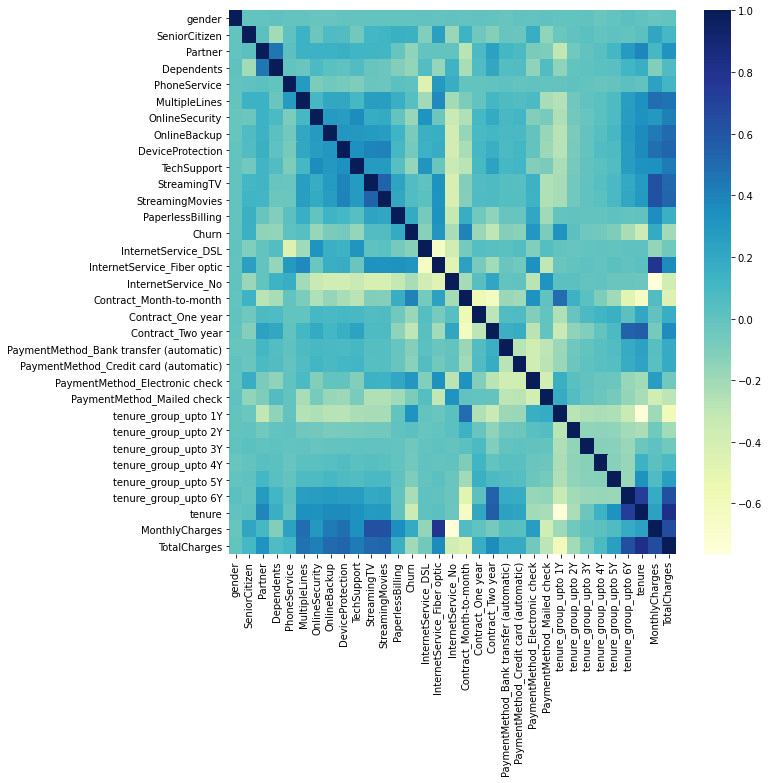

In [24]:
# Using seaborn
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(telcom.corr(), cmap='YlGnBu')

In [25]:
telcom.corr().nlargest(10, 'Churn')['Churn']

Churn                             1.000000
Contract_Month-to-month           0.404565
tenure_group_upto 1Y              0.319628
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
StreamingTV                       0.063254
StreamingMovies                   0.060860
Name: Churn, dtype: float64

In [26]:
# using plotly go

correlation = telcom.corr() # this return a dataframe
# matrix columns for the axes
corr_cols = correlation.columns.tolist()
# convert correlation to an array for the heatmap
corr_array = np.array(correlation)

trace = go.Heatmap(z =np.array(correlation), 
                   x= corr_cols, 
                   y= corr_cols,
                   colorscale='Viridis',
                   colorbar = dict(title='Peasron Correlation coefficient',
                                  titleside='right')
                   )
layout = go.Layout(dict(title='Correlation matrix',
                       height=1000,
                       width=1000))
fig = go.Figure(data=trace, layout=layout)
fig.show()

### * Data visualization using PCA *

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# select all columns other than ID and target
X = telcom[[col for col in telcom.columns if col not in ['customerID', 'Churn']]]
Y = telcom[['customerID', 'Churn']]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# merge with the Y variables for plotting
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how='left')
pca_data

# for easier interpertation , change Churn: 1 and Not Churn: 0
pca_data['Churn'] = pca_data['Churn'].map({0: 'Not_Churn', 1: 'Churn'})
#scatter plot

#pca_data
def pca_scatter(target, color):
    trace = go.Scatter(x = pca_data[pca_data['Churn'] == target]['PC1'],
                       y = pca_data[pca_data['Churn'] == target]['PC2'],
                       name = target,
                       mode='markers',
                       marker = dict(color = color,
                                     symbol='diamond-open'),
                       text = 'Customer Id: '+ pca_data[pca_data['Churn'] == target]['customerID'])
    return trace

layout = go.Layout(dict(title='Visualizing data using PCs',
                        xaxis = dict(title='principal component 1',
                                     zerolinewidth=1,
                                     gridcolor = 'rgb(255, 255, 255)'
                                    ),
                        yaxis = dict(title='principal component 2',
                                     zerolinewidth=1,
                                     gridcolor = 'rgb(255, 255, 255)'
                                    ),
                        height=700
                       )
                  )

trace1 = pca_scatter('Churn', 'red')
trace2 = pca_scatter('Not_Churn', 'green')
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

In [28]:
pca_data

,PC1,PC2,customerID,Churn
0,-2.092089,-0.258897,7590-VHVEG,Not_Churn
1,-0.391416,0.733391,5575-GNVDE,Not_Churn
2,-1.768625,-0.507066,3668-QPYBK,Churn
3,-0.139038,1.284375,7795-CFOCW,Not_Churn
4,-1.556596,-1.504741,9237-HQITU,Churn
...,...,...,...,...
7027,0.579408,-0.231499,6840-RESVB,Not_Churn
7028,3.454054,0.158094,2234-XADUH,Not_Churn
7029,-1.842118,0.126126,4801-JZAZL,Not_Churn
7030,-1.242426,-1.277033,8361-LTMKD,Churn


In [29]:
pca.components_

array([[-0.00159715,  0.02734672,  0.09959536,  0.01840326,  0.01887509,
         0.14642457,  0.11253451,  0.14767177,  0.15642585,  0.12147505,
         0.16390768,  0.16513224,  0.05912574, -0.01151429,  0.12151315,
        -0.10999885, -0.12819165,  0.03941556,  0.08877609,  0.04803076,
         0.0460653 , -0.00355912, -0.09053693, -0.16463127, -0.03623707,
        -0.00354832,  0.01707665,  0.04546512,  0.1418749 ,  0.47122853,
         0.42827879,  0.56032955],
       [ 0.00734532, -0.07930768,  0.11440349,  0.12424097, -0.04154308,
        -0.07842834,  0.03297613, -0.0297917 , -0.03831245,  0.0205398 ,
        -0.13104959, -0.12866268, -0.1642485 ,  0.08613778, -0.29993522,
         0.21379744, -0.27708485,  0.07194537,  0.20513948,  0.06600584,
         0.06968828, -0.21318786,  0.07749374, -0.15845994, -0.0333636 ,
        -0.00758862,  0.02111468,  0.04241845,  0.13587904,  0.45104857,
        -0.55652667,  0.06883149]])

In [30]:
pca.explained_variance_

array([2.99500763, 1.3697544 ])

In [31]:
pca.explained_variance_ratio_

array([0.35091261, 0.16048844])

Text(0, 0.5, 'cumulative explained variance')

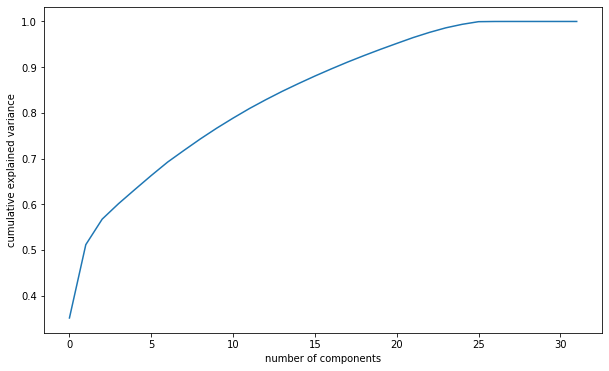

In [32]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Binary variable distribution in customer attrition using 'Radar chart'

In [33]:
binary_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [34]:
data_radar = telcom[binary_cat]
data_radar

df = data_radar[data_radar['Churn'] == 1]
df_sum = df.sum().reset_index()
df_sum.columns = ['features', 'yes']
df_sum['no'] = df.shape[0] - df_sum['yes']

# select all features except Churn
df_x = df_sum[df_sum['features'] != 'Churn']
df_x

,features,yes,no
0,gender,930,939
1,SeniorCitizen,476,1393
2,Partner,669,1200
3,Dependents,326,1543
4,PhoneService,1699,170
5,MultipleLines,850,1019
6,OnlineSecurity,295,1574
7,OnlineBackup,523,1346
8,DeviceProtection,545,1324
9,TechSupport,310,1559


In [35]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

In [36]:
data_radar = telcom[binary_cat]
# data_radar

# df = data_radar[data_radar['Churn'] == 1]
# df_sum = df.sum().reset_index()
# df_sum.columns = ['features', 'yes']
# df_sum['no'] = df.shape[0] - df_sum['yes']

# # select all features except Churn
# df_x = df_sum[df_sum['features'] != 'Churn']


def plot_radar(data_radar, filter_y_n, title):
    
    df = data_radar[data_radar['Churn'] == filter_y_n]
    df_sum = df.sum().reset_index()
    df_sum.columns = ['features', 'yes']
    df_sum['no'] = df.shape[0] - df_sum['yes']

    # select all features except Churn
    df_x = df_sum[df_sum['features'] != 'Churn']
    
    # for 'Churn'- 'yes'
    trace1 = go.Scatterpolar(r =  df_x['yes'].values.tolist(), # features sum of the count
                           theta = df_x['features'].tolist(), # all the features
                           fill='toself',
                           name= 'yes',
                           mode='markers+lines',
                           marker = dict(size=10)
                           )
    # for 'Churn'- 'no'
    trace2 = go.Scatterpolar(r =  df_x['no'].values.tolist(), # features sum of the count
                           theta = df_x['features'].tolist(), # all the features
                           fill='toself',
                           name= 'no',
                           mode='markers+lines',
                           marker = dict(size=10)
                           )

    layout = go.Layout(dict(polar = dict(radialaxis = 
                                         dict(visible=True,
                                              showline=True,
                                              linewidth= 3, # width for the radial axis
                                              linecolor='white',
                                              gridwidth = 3,
                                              gridcolor='white'),
#                                          angularaxis = dict(tickfont = dict(size = 10),
#                                                             layer = "below traces")
                                                           )                                     
                                        ),
                        title = title,
                        height=700
                      )
                        
                           
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()
    
# plot
trace1 = plot_radar(data_radar, 1, 'Churn - Customers')
#trace2 = plot_radar(data_radar, 0, 'Non_Churn - Customers')

## Creating models

### *Baseline models*

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve, scorer

# Discrimination plot
from yellowbrick.classifier import DiscriminationThreshold

# split into train and validation sets
train, test = train_test_split(telcom, test_size=0.25, random_state=0)

import plotly.tools as tls #visualization
import plotly.offline as py #visualization
import plotly.figure_factory as ff # for the annoted heatmap in plotly

#target_col
#Id_col

# selecting all other columns other than Id column and target column
cols = [col for col in telcom.columns if col not in ['customerID','Churn']]
X_train = train[cols]
y_train = train['Churn']
X_test = test[cols]
y_test = test['Churn']

In [79]:
def churn_prediction(model, X_train, y_train, X_test, y_test, cols, cf, threshold_plot):
    
    # model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)
    
    # coeff
    if cf == 'coefficients':
        coefficients = pd.DataFrame(model.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(model.feature_importances_)
        
    cols_df = pd.DataFrame(cols)
    #merge the features with their importance or coefficients
    coef_summary = pd.merge(coefficients, cols_df, left_index=True, right_index=True, how='left')
    coef_summary.columns= ['coefficients', 'features']
    
    # sort by importance
    coef_summary = coef_summary.sort_values(by='coefficients', ascending=False)
    
    print(model)
    print('\nClassification report:\n', classification_report(y_test, predictions))
    print('Accuracy score : ', accuracy_score(y_test, predictions))
    
    # confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, probabilities[:,1]) # probabilities of 0 and 1, use the second column
    print('\nArea under the ROC-AUC curve is : ', model_roc_auc, '\n')
    
    # fpr, tpr, threshold
    fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
    
    
    # traces for plot
    
    # trace 1 for 'Confusion matrix'
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ['Non_Churn', 'Churn'],
                        y = ['Non_Churn', 'Churn'],
                        showscale=False,
                        colorscale='Viridis',
                        name = 'confusion matrix')
    
    # trace 2 for 'roc-auc' curve
    trace2 = go.Scatter(x = fpr,
                        y = tpr,
                        line = dict(width = 2, color = ('rgb(20,30,150)')),
                        name= 'ROC : ' + str(model_roc_auc),
                        )
    # trace 3 for the dotted line in the 'roc-auc' curve
    trace3 = go.Scatter(x = [0,1],
                        y =[0,1],
                        line = dict(width = 2, color = 'red', dash='dot')
                        )
    
    # trace 4 - plot the coefficients
    trace4 = go.Bar(x = coef_summary['features'],
                    y = coef_summary['coefficients'],
                    name = 'coefficients',
                    #mode='markers',
                    marker = dict(color = coef_summary['coefficients'], # to get the bars with different color scales
                                  colorscale='Picnic',
                                  line = dict(width=1, color='black'))
                    )
    
    # trace 5
#     trace5  = ff.create_annotated_heatmap(z = conf_matrix,
#                                          x = ['Not_Churn', 'Churn'],
#                                          y = ['Not_Churn', 'Churn'],
#                                          colorscale='Viridis',
#                                          )
    
    # create as subplots
#     fig =  make_subplots(rows=2, cols =2,
#                             subplot_titles = ['Confusion Matrix', 'ROC-AUC characteristic', 'Feature importances'])


# for subplots, with difference column spans, refer below link:
# https://plotly.com/python/subplots/
# https://plotly.com/python-api-reference/generated/plotly.subplots.make_subplots.html
    
    # make_sublots option also works fine instead of using tls.make_subplots
    fig = tls.make_subplots(rows=2, cols=2,
                            print_grid=True, # to show how the grid looks like
                            specs=[[{}, {}],
                                   [{'colspan': 2}, None], # for the 2rd row use 2 column spaces and make the 2nd column in the 2rd row None 
                                  ],
                            subplot_titles=['Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances',
                                            ]
                           )
    
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)
    fig.append_trace(trace4, 2, 1)
    #fig.append_trace(trace5, 3, 1)
    
#     fig.update_layout(autosize=False, height=900, width=800, title_text="Subplots", showlegend=False)
#     fig.show()
#     layout = go.Layout(dict(title ='Model performance'), height=900, width=800)
    
    fig['layout'].update(showlegend=False, title='Model performance',
                        autosize=False, height=1000, width=800)
    
    fig['layout']['xaxis1'].update(dict(title='Predictions'))
    fig['layout']['yaxis1'].update(dict(title='Actuals'))
    fig['layout']['xaxis2'].update(dict(title='False positive rate'))
    fig['layout']['yaxis2'].update(dict(title='True positive rate'))
    fig['layout']['xaxis3'].update(dict(tickfont =dict(size=10)), tickangle=90)

    fig.show()
#     py.iplot(fig)
    
    if threshold_plot == True:
        visualizer = DiscriminationThreshold(model)
        visualizer.fit(X_train, y_train)
        visualizer.show()
        

### * Logistic Regression *

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1311
           1       0.53      0.72      0.61       447

    accuracy                           0.77      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.77      0.78      1758

Accuracy score :  0.7684869169510807

Area under the ROC-AUC curve is :  0.8319152857340315 

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



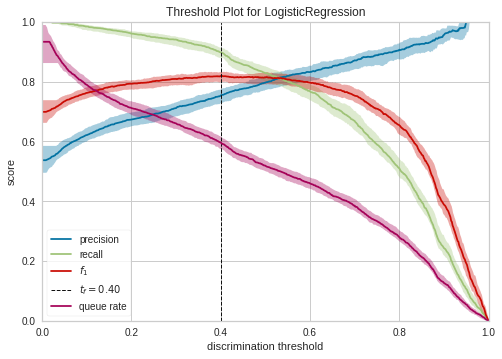

In [76]:
logreg = LogisticRegression()
churn_prediction(logreg, X_train, y_train, X_test, y_test, cols, 'coefficients', threshold_plot=True)

### * Annoted heatmap of the confusion matrix*

In [74]:
import plotly.figure_factory as ff

def annotated_heatmap(model, X_train, y_train, X_test, y_test, cf):
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)

    # coeff
    if cf == 'coefficients':
        coefficients = pd.DataFrame(model.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(model.feature_importances_)

    cols_df = pd.DataFrame(cols)
    #merge the features with their importance or coefficients
    coef_summary = pd.merge(coefficients, cols_df, left_index=True, right_index=True, how='left')
    coef_summary.columns= ['coefficients', 'features']

    # sort by importance
    coef_summary = coef_summary.sort_values(by='coefficients', ascending=False)

    print(model)
    print('\n Confusion Matrix - Annotated\n')

    # confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    fig = ff.create_annotated_heatmap(z = conf_matrix,
                                x = ['Not_Churn', 'Churn'],
                                y = ['Not_Churn', 'Churn'],
                                colorscale='Viridis')
    
    fig['layout'].update(dict(title='Confusion matrix'))
    fig['layout']['xaxis'].update(dict(title='Predictions'))
    #fig['layout']['xaxis']['side']='bottom' # to put the axis label at the bottom
    fig['layout']['yaxis'].update(dict(title='Actuals'))
    fig.show()

### * Annoted heatmap of the confusion matrix - Log regression*

In [41]:
annotated_heatmap(logreg, X_train, y_train, X_test, y_test, cf='coefficients')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 Confusion Matrix - Annotated



## ** Dataset is imbalanced in terms of the target - 'Churn'**
    - Count of Churn - 1869
    - Count of Non_Churn - 5163
    - Use techniques to oversample the minority or undersample the majority class

In [42]:
telcom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### * Synthetic Minority Oversampling Technique(SMOTe) *
- Randomly pick a instance from the minority class.
- Compute the k-nearest neighbors (for some pre-specified k) for this point.
- Add k new points somewhere between the chosen point and each of its neighbors

Using TensorFlow backend.


the number of classes after applying over sampling using SMOTE
 (array([0, 1]), array([3852, 3852]))
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      1311
           1       0.55      0.69      0.61       447

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.79      1758

Accuracy score :  0.7775881683731513

Area under the ROC-AUC curve is :  0.8364424581539444 

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



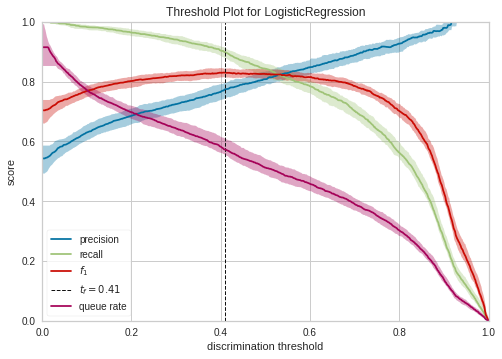

In [43]:
from imblearn.over_sampling import SMOTE
cols = [col for col in telcom.columns if col not in ['customerID','Churn']]

# oversample the minority class using SMOTE
os = SMOTE()
smote_X, smote_Y = os.fit_sample(X_train, y_train) # this returns dataframes for X and Y - is a Series


# check the number of classes after over sampling
print('the number of classes after applying over sampling using SMOTE\n', np.unique(smote_Y.values, return_counts=True))

# churn prediction
churn_prediction(logreg, smote_X, smote_Y, X_test, y_test, cols, 'coefficients', threshold_plot=True)

### Recursive Feature Elimination (RFE)
- References: https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html
- References: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

Features selected - true or false
 [False False False False  True False  True  True False  True  True False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False False  True  True False]
feature ranks 
 [11 13 12  9  1  5  1  1  4  1  1  2 10  1  1  3  1  1  1  1  1  1  1  1
  1  1  1  6  7  1  1  8]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1311
           1       0.53      0.72      0.61       447

    accuracy                           0.77      1758
   macro avg       0.71      0.75      0.72      1758
weighted avg       0.80      0.

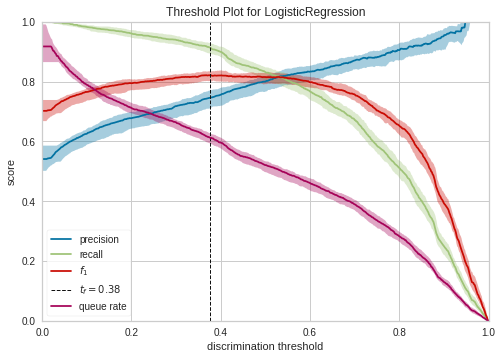

In [44]:
from sklearn.feature_selection import RFE

# specified number of features:
k=20

# Using RFE on the logistic regression model

rfe = RFE(logreg, k)
rfe.fit(smote_X, smote_Y.values.ravel())

# selected features
print('Features selected - true or false\n', rfe.support_)

# feature ranks
print('feature ranks \n',rfe.ranking_)

# create a dataframe
rfe_df = pd.DataFrame({"Columns": cols,
                     'Features selected': rfe.support_,
                     'Feature rank': rfe.ranking_})

cols_rfe = rfe_df[rfe_df['Features selected'] == True]['Columns'].tolist()


# Get the train and test sets
X_train = smote_X[cols_rfe]
y_train = smote_Y
X_test = test[cols_rfe]
y_test = test['Churn']


# churn prediction
churn_prediction(logreg, X_train, y_train, X_test, y_test, cols, 'coefficients', threshold_plot=True)

# create table
fig = ff.create_table(rfe_df)
fig.show()

In [45]:
cols_rfe = rfe_df[rfe_df['Features selected'] == True]['Columns'].tolist()

### Univariate selection
- We will do feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
- This will use the chi squared (chi^2) statistical test for non-negative features to select the best features

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# select cols
cols

# using previous copy of telcom
X = telcom_copy[cols]
y = telcom_copy['Churn']

# instantiate
# select k best features
select = SelectKBest(score_func = chi2, k = 3)
fit = select.fit(X, y)

print('score\n', fit.scores_)
print('p-values\n', fit.pvalues_)

# create a dataframe
best_df = pd.DataFrame({'features': cols,
                      'score': fit.scores_,
                      'pvalue': fit.pvalues_})

best_df['feature_type'] =  np.where(best_df['features'].isin(features_numeric), 'Numerical', 'Categorical')


# plot the numeric and categorical features

trace1 = go.Scatter(x = best_df[best_df['feature_type'] == 'Categorical'].sort_values('score', ascending=False)['features'],
                   y = best_df[best_df['feature_type'] == 'Categorical'].sort_values('score', ascending=False)['score'],
                   name = 'Categorical features scores',
                   mode = 'lines+markers',
                   marker = dict(color = 'red',
                                line = dict(width = 2)),
                   )

trace2 = go.Bar(x = best_df[best_df['feature_type'] == 'Numerical']['features'],
                   y = best_df[best_df['feature_type'] == 'Numerical']['score'],
                   name = 'Numerical features scores',
                   marker = dict(color = best_df[best_df['feature_type'] == 'Numerical']['score'],
                                 colorscale='Picnic',
                                line = dict(width = 2)),
                   )

# layout = go.Layout(dict(title = 'Score for numerical and categorical features',
#                         xaxis1 = dict(domain=[0, 0.7]),
#                         yaxis1 = dict(title='score'),
#                         xaxis2 = dict(domain=[0.8, 1]),
#                         yaxis2 = dict(title='score')
#                       )
#                   )

fig1 = go.Figure(data = trace1, layout = dict(title='Categorical features scores',
                                             xaxis = dict(title = 'features'),
                                             yaxis = dict(title = 'scores')))
fig1.show()

fig2 = go.Figure(data = trace2, layout = dict(title='Numerical features scores',
                                             xaxis = dict(title = 'features'),
                                             yaxis = dict(title = 'scores'),
                                              height =500, width=600
                                              
                                             )
                )
fig2.show()
                   

score
 [2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 6.51465136e+00 1.47165601e+02 3.12098318e+01
 2.02160070e+01 1.35439602e+02 1.73206148e+01 1.59306111e+01
 1.04979224e+02 7.11376111e+01 3.72082851e+02 2.85475152e+02
 5.16714004e+02 1.76608724e+02 4.86223101e+02 7.66190658e+01
 9.99725387e+01 4.24113152e+02 4.47251434e+01 4.96199796e+02
 2.38616006e+00 1.04209180e+01 2.22562632e+01 6.29955193e+01
 2.87501128e+02 1.63773281e+04 3.65307468e+03 6.29630810e+05]
p-values
 [6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 1.06989295e-002 7.21988253e-034 2.31590182e-008
 6.91717063e-006 2.64595220e-031 3.15742928e-005 6.57073922e-005
 1.23423173e-024 3.33158163e-017 6.58713045e-083 4.81399951e-064
 2.19511926e-114 2.66631661e-040 9.45428638e-108 2.07328356e-018
 1.54524820e-023 3.10584857e-094 2.26727030e-011 6.38005232e-110
 1.22413991e-001 1.24595948e-003 2.38579307e-006 2.07177341e-015
 1.74199079e-064 0.00000000e+000 0.0000

In [47]:
features_numeric

['tenure', 'MonthlyCharges', 'TotalCharges']

### Decision Tree
- Visualize a decision tree using the top 3 numerical features
- Limit to 3 features to have a cleare view

In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # for viewing the Decision Tree
from graphviz import Source

# selecting the top 3 categorical features based on the score

scores_sorted = best_df.sort_values('score', ascending=False)
top3_cat = scores_sorted[scores_sorted['feature_type'] == 'Categorical'][:3]['features'].tolist()

top3_numeric = scores_sorted[scores_sorted['feature_type'] == 'Numerical'][:3]['features'].tolist()



#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(cols, maximum_depth, criterion_type, split_type, model_performance = None):
    
#     X = telcom_copy[cols]
#     y = telcom_copy['Churn']
    X_train = train[cols]
    y_train = train['Churn']
    X_test = test[cols]
    y_test = test['Churn']
    
    dtc = DecisionTreeClassifier(max_depth = maximum_depth,
                                  splitter = split_type,
                                  criterion = criterion_type)
    dtc.fit(X_train, y_train)
    
    # plot the decision tree
    graph = Source(export_graphviz(dtc, feature_names = cols,
                           precision = 2,
                           class_names = ['Not Churn', 'Churn'],
                           filled = True)
                  )
                  
    
    # display graph
    display(graph)
    
    # to get model performance
    if model_performance == True:
        churn_prediction(dtc, X_train, y_train, X_test, y_test, cols, 'features', threshold_plot=True)

### Using top 3 numeric features

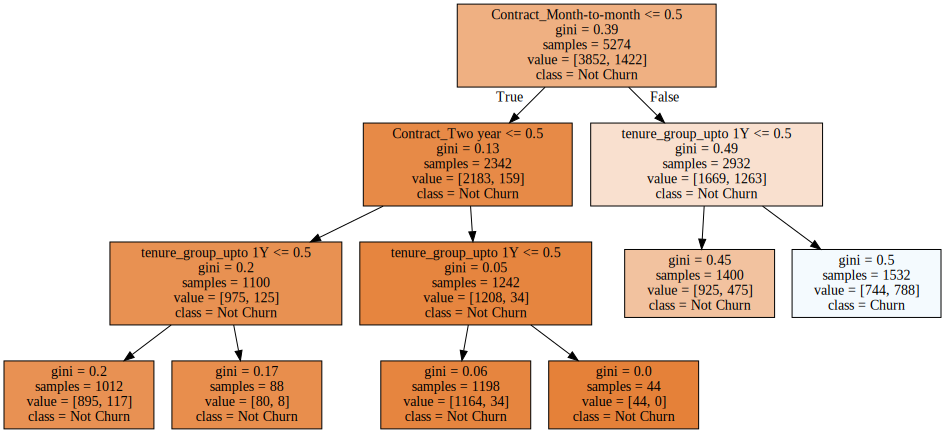

In [77]:
plot_decision_tree(top3_cat, 3, 'gini', 'best', model_performance = False)

### Using top 3 categorical features

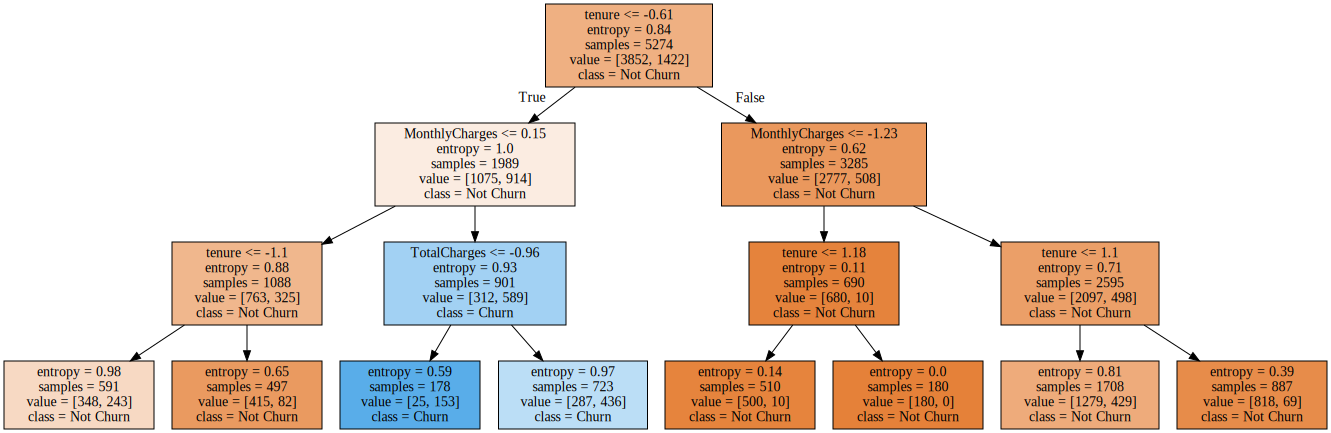

AttributeError: 'DecisionTreeClassifier' object has no attribute 'features_importances_'

In [80]:
plot_decision_tree(top3_numeric, 3, 'entropy', 'best', model_performance = True)